In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from skimage.io import imread
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
img = cv2.imread("/content/eHouT0ag.jpeg")[:,:,::-1]
img = img.mean(axis=2)

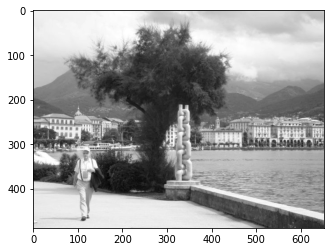

In [ ]:

%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

In [ ]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

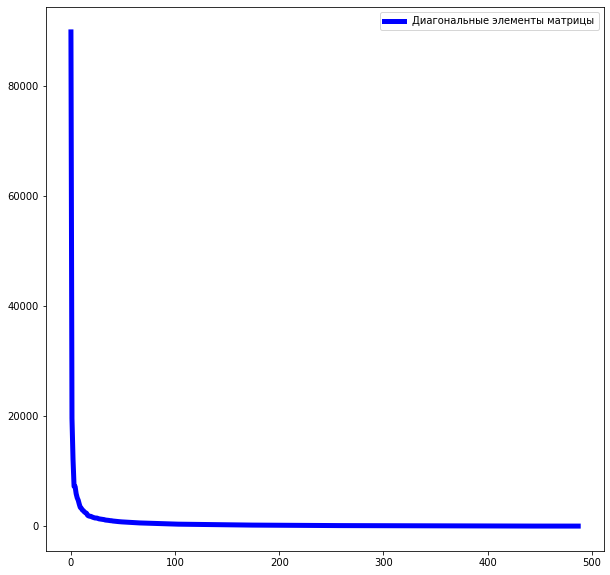

In [ ]:
sigma = S
plt.figure(figsize=(10, 10))
plt.plot(sigma, label='Диагональные элементы матрицы', linewidth=5, color='blue')
plt.legend()

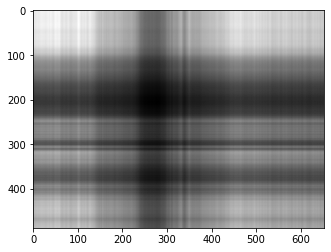

In [ ]:
ans = U[:, 0:1] * S[0] * VT[0:1, :]
p = plt.imshow(ans, cmap='gray')
plt.show()


    С первой по двадцатую


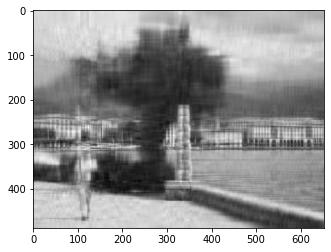


    С первой по пятидесятую


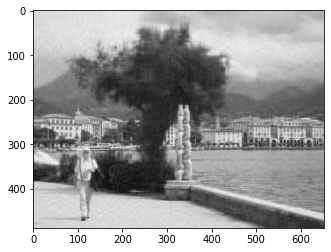


    С двадцатой по сотую


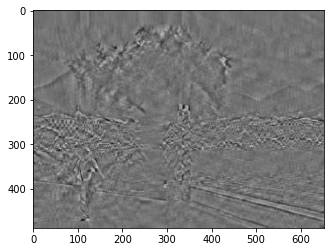


    С двадцатой по последнюю


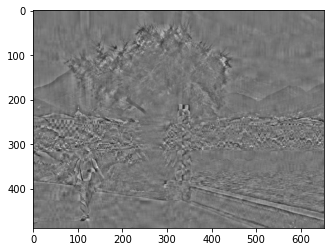

In [ ]:
Si = np.diag(S)
sum20 = np.dot(U[:,0:20], np.dot(Si[0:20,0:20], VT[0:20,:]))
#sum20 = U[:, 0:20] * Si[0:20, 0:20] * VT[0:20, :]
p1 = plt.imshow(sum20, cmap='gray')
print('\n', "   С первой по двадцатую")
plt.show()

sum50 = np.dot(U[:,0:50], np.dot(Si[0:50,0:50], VT[0:50,:]))
#sum20 = U[:, 0:20] * Si[0:20, 0:20] * VT[0:20, :]
p2 = plt.imshow(sum50, cmap='gray')
print('\n', "   С первой по пятидесятую")
plt.show()

sum20_100 = np.dot(U[:,19:100], np.dot(Si[19:100,19:100], VT[19:100,:]))
#sum20 = U[:, 0:20] * Si[0:20, 0:20] * VT[0:20, :]
p3 = plt.imshow(sum20_100, cmap='gray')
print('\n', "   С двадцатой по сотую")
plt.show()

sum20_n = np.dot(U[:,19:], np.dot(Si[19:,19:], VT[19:,:]))
#sum20 = U[:, 0:20] * Si[0:20, 0:20] * VT[0:20, :]
p4 = plt.imshow(sum20_n, cmap='gray')
print('\n', "   С двадцатой по последнюю")
plt.show()


    С первой по 110-ую


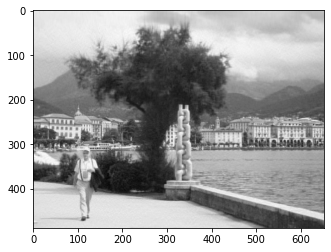

In [ ]:
Si = np.diag(S)
sum110 = np.dot(U[:,0:110], np.dot(Si[0:110,0:110], VT[0:110,:]))
p1 = plt.imshow(sum110, cmap='gray')
print('\n', "   С первой по 110-ую")
plt.show()

In [ ]:
print("Размеры изображения: \n n =", img.shape[0], "\n m =", img.shape[1])

Размеры изображения: 
 n = 488 
 m = 653


In [ ]:
U_my, S_my, VT_my = U[:, 0:111], S[0:111], VT[0:111, :]
print(" Исходник весит:", U.nbytes + S.nbytes + VT.nbytes, '\n', "Мое приближение весит:", U_my.nbytes + S_my.nbytes + VT_my.nbytes)
print('\n', "Отношение : ",(U.nbytes + S.nbytes + VT.nbytes)/(U_my.nbytes + S_my.nbytes + VT_my.nbytes))

 Исходник весит: 4458368 
 Мое приближение весит: 1014096

 Отношение :  4.396396396396397


0


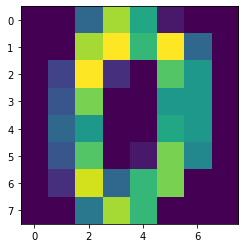

In [ ]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

In [ ]:
U, S, VT = svd(digits.data, full_matrices=False)

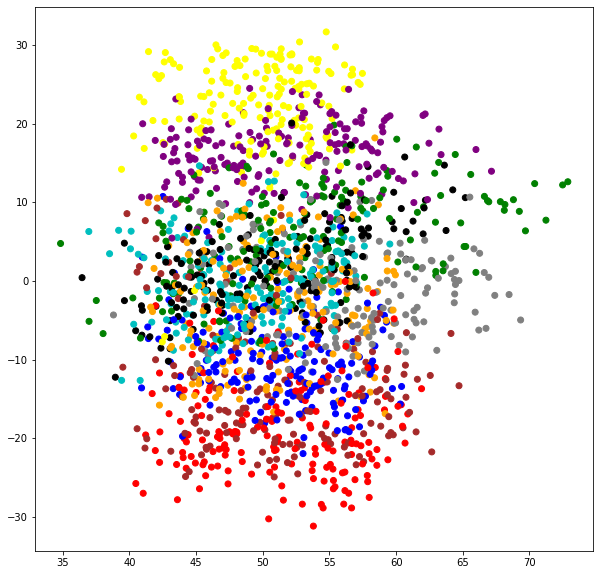

In [ ]:
Si = np.diag(S)
US = np.dot(U, Si)
plt.figure(figsize=(10, 10))
colors = ['black' if target==0 
          else 'green' if target==1
          else 'blue' if target==2
          else 'red' if target==3
          else 'yellow' if target==4
          else 'orange' if target==5
          else 'purple' if target==6
          else 'c' if target==7
          else 'gray' if target==8
          else 'brown'
          for target in digits.target]
plt.scatter(US[:, 0:1], US[:, 1:2], c = colors)

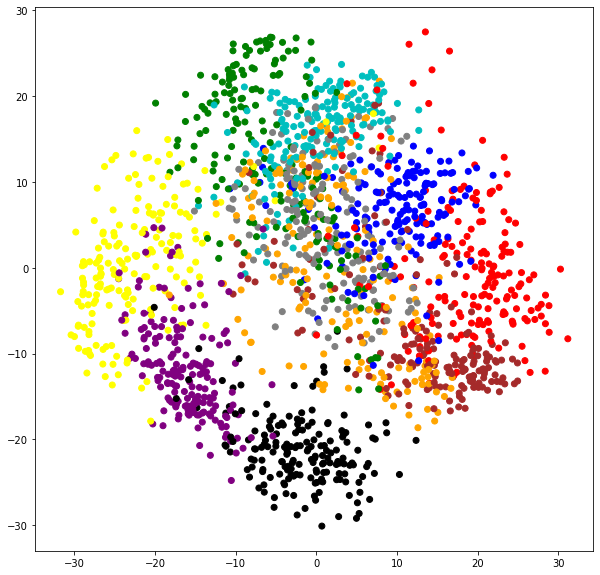

In [ ]:
NEW = digits.data - digits.data.mean(axis=0, keepdims=True)
U_NEW, S_N, VT_NEW = svd(NEW, full_matrices=False)
S_NEW = np.diag(S_N)
US_NEW = np.dot(U_NEW, S_NEW)
plt.figure(figsize=(10, 10))
colors = ['black' if target==0 
          else 'green' if target==1
          else 'blue' if target==2
          else 'red' if target==3
          else 'yellow' if target==4
          else 'orange' if target==5
          else 'purple' if target==6
          else 'c' if target==7
          else 'gray' if target==8
          else 'brown'
          for target in digits.target]
plt.scatter(US_NEW[:, 0:1], US_NEW[:, 1:2], c = colors)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

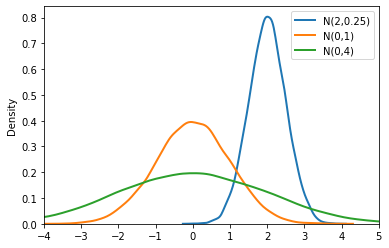

In [ ]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()


In [ ]:
N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s, shade=False, color='g')

In [22]:
N = 1000
X = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=N)

In [ ]:
U, S, VT = svd(X, full_matrices=False)
plt.figure(figsize=(9,9))
plt.scatter(X[:,0], X[:,1], color='red')
sns.kdeplot(X, shade=False, color='g')
plt.arrow(0, 0, VT[0][0], VT[0][1], color='blue', width=0.09)
plt.arrow(0, 0, VT[1][0], VT[1][1], color='blue', width=0.09)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


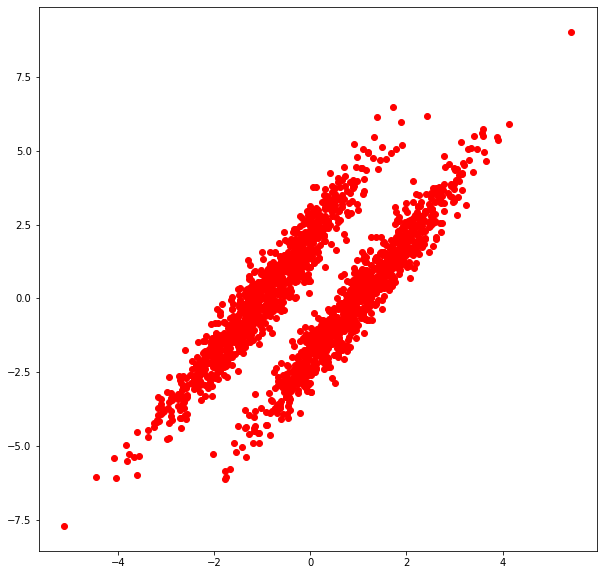

In [24]:
plt.figure(figsize=(10,10))
N = 1000

X1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[1,2.2],[2.2,4.5]]), size=N)

plt.scatter(X1[:,0], X1[:,1], color='red')

X2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array([[1,2.2],[2.2,4.5]]), size=N)

plt.scatter(X2[:,0], X2[:,1], color='red')

plt.show()

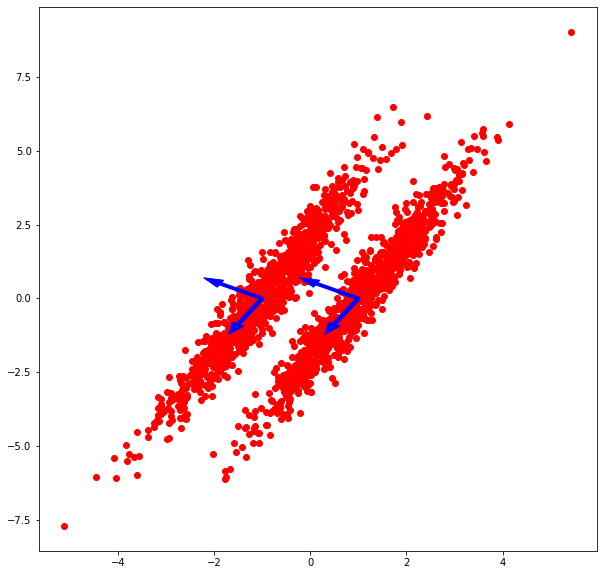

In [25]:
plt.figure(figsize=(10,10))
N = 1000
U1, S1, VT1 = svd(X1, full_matrices=False)
U2, S2, VT2 = svd(X1, full_matrices=False)

plt.scatter(X1[:,0], X1[:,1], color='red')
plt.scatter(X2[:,0], X2[:,1], color='red')

plt.arrow(-1, 0, VT1[0][0], VT1[0][1], color='blue', width=0.09)
plt.arrow(-1, 0, VT1[1][0], VT1[1][1], color='blue', width=0.09)

plt.arrow(1, 0, VT2[0][0], VT2[0][1], color='blue', width=0.09)
plt.arrow(1, 0, VT2[1][0], VT2[1][1], color='blue', width=0.09)

plt.show()

In [26]:
N = 1000
K = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=N)

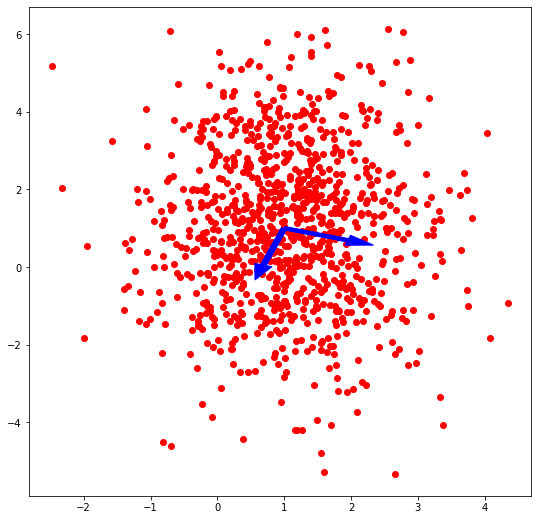

In [28]:
U, S, VT = svd(K, full_matrices=False)
plt.figure(figsize=(9,9))
plt.scatter(K[:,0], K[:,1], color='red')
#sns.kdeplot(K, shade=False, color='g')
plt.arrow(1, 1, VT[0][0], VT[0][1], color='blue', width=0.09)
plt.arrow(1, 1, VT[1][0], VT[1][1], color='blue', width=0.09)
plt.show()

In [33]:
im = cv2.imread("photo_2021-12-06_00-39-26.jpg")[:,:,::-1]

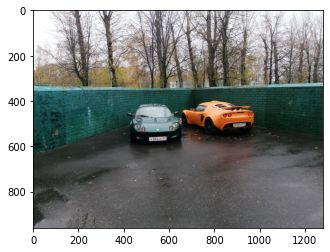

In [34]:
plt.imshow(im)
plt.show()

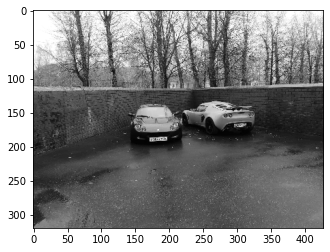

In [31]:
def mult(a, b):
    s = 0
    for i in range(3):
        for j in range(3):
            s += float(a[i][j])*float(b[i][j])
    return s

def blur(im):
    c = np.array([[0, 0.25, 0], [0.25, 0, 0.25], [0, 0.25, 0]])
    im_blur = np.zeros((np.shape(im)[0]-2, np.shape(im)[1]-2))
    for i in range(np.shape(im)[0]-2):
        for j in range(np.shape(im)[1]-2):
            srez = im[i:(i+3), j:(j+3)]
            s = mult(srez, c)
            im_blur[i][j] = s
    return im_blur

def clarity(im):
    c = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    im_clar = np.zeros((np.shape(im)[0] - 2, np.shape(im)[1] - 2))
    for i in range(np.shape(im)[0] - 2):
        for j in range(np.shape(im)[1] - 2):
            srez = im[i:(i + 3), j:(j + 3)]
            s = mult(srez, c)
            im_clar[i][j] = s
    return im_clar

im = cv2.imread("photo_2021-12-06_00-39-26.jpg")[:,:,::-1]

im = im[::3, ::3, :]

mi = im.min()
ma = im.max() - mi

m = (np.shape(im))

mas = np.ones(m, dtype=int)

im = (im - mas * int(mi))*255/ma

R = im[::, ::, 0]
G = im[::, ::, 1]
B = im[::, ::, 2]

imf = R * 0.2126 + G * 0.7152 + B * 0.0722

im_blur = blur(imf)
im_clar = clarity(imf)

plt.imshow(imf, cmap = "gray")
plt.show()

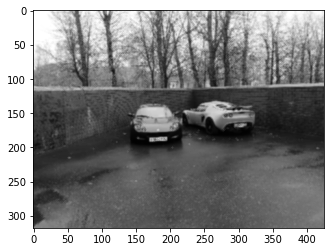

In [30]:
plt.imshow(im_blur, cmap = "gray")
plt.show()

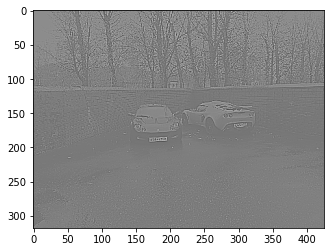

In [32]:
plt.imshow(im_clar, cmap = "gray")
plt.show()